In [1]:
#import necessaty libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
#ques1. syntax of loading a dataset
df = pd.read_csv('/kaggle/input/unstop-igniters-rcciit-day-1/data.csv')

In [3]:
df.head(10)
#ques2. what type of ml mode -> supervised
#ques3. -> classificatiom

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1
5,57,male,typical angina,140,192,lower than 120mg/ml,ST-T wave abnormality,148,no,0.4,flat,0,fixed defect,1
6,56,female,atypical angina,140,294,lower than 120mg/ml,normal,153,no,1.3,flat,0,normal,1
7,44,male,atypical angina,120,263,lower than 120mg/ml,ST-T wave abnormality,173,no,0.0,downsloping,0,reversable defect,1
8,52,male,non-anginal pain,172,199,greater than 120mg/ml,ST-T wave abnormality,162,no,0.5,downsloping,0,reversable defect,1
9,57,male,non-anginal pain,150,168,lower than 120mg/ml,ST-T wave abnormality,174,no,1.6,downsloping,0,normal,1


In [4]:
df.shape

(296, 14)

# Data Preprocessing

In [5]:
df.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                         int64
dtype: object

In [6]:
df.isnull().sum()

age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar          0
resting_electrocardiogram    0
max_heart_rate_achieved      0
exercise_induced_angina      0
st_depression                0
st_slope                     0
num_major_vessels            0
thalassemia                  0
target                       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [9]:
df['chest_pain_type'].unique()

array(['asymptomatic', 'non-anginal pain', 'atypical angina',
       'typical angina'], dtype=object)

In [10]:
# numerical features
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']

# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']

# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']

cat_feats = nom_feats + bin_feats

In [11]:
df[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


#  Univariate EDA - Categorical Data

<Axes: xlabel='thalassemia', ylabel='count'>

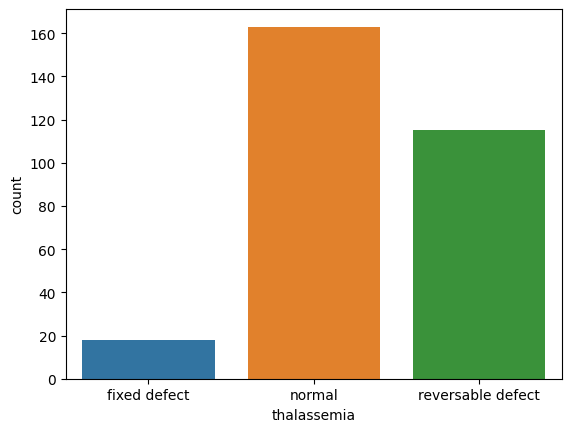

In [12]:
sns.countplot(x='thalassemia', data=df)

<Axes: ylabel='count'>

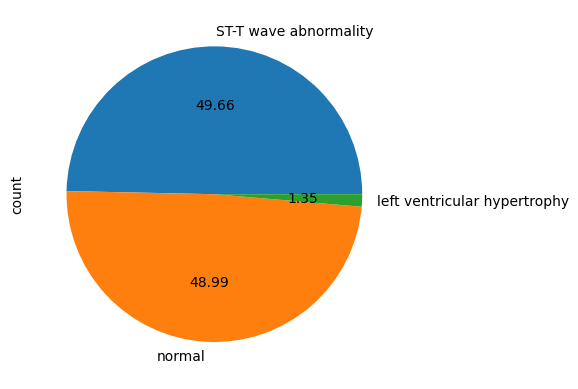

In [13]:
df['resting_electrocardiogram'].value_counts().plot(kind='pie',autopct='%.2f')

#  Univariate EDA - Numerical Data

(array([ 1.,  9., 32., 38., 35., 59., 62., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

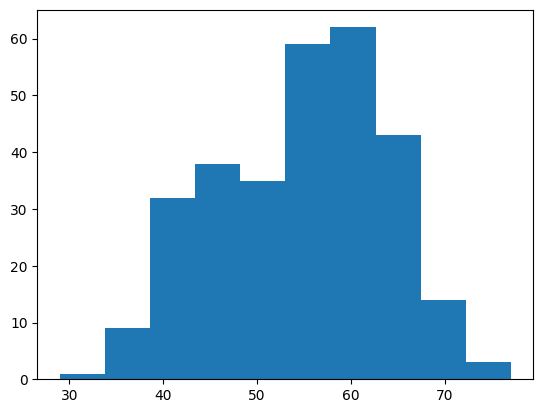

In [14]:
plt.hist(df['age'],bins=10)

<Axes: xlabel='age', ylabel='Density'>

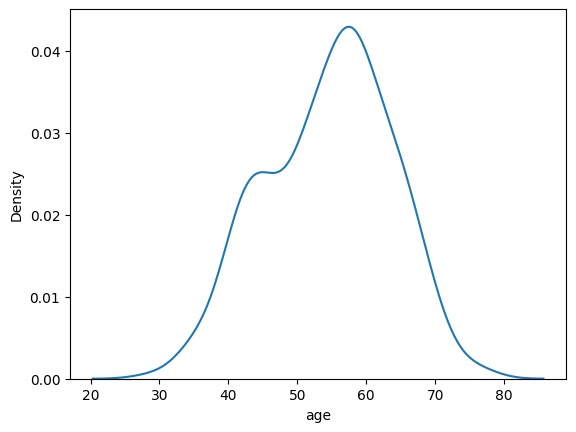

In [15]:
sns.distplot(df['age'], hist=False)

#  Multivariate EDA

# 1. Scatterplot

<Axes: xlabel='age', ylabel='cholesterol'>

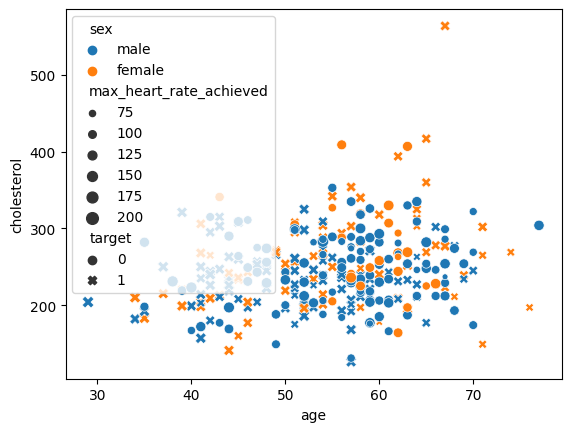

In [16]:
sns.scatterplot(x='age', y='cholesterol', data=df, hue='sex', size='max_heart_rate_achieved', style='target')

# 2. Bar Plot (Numerical - Categorical)

<Axes: xlabel='thalassemia', ylabel='age'>

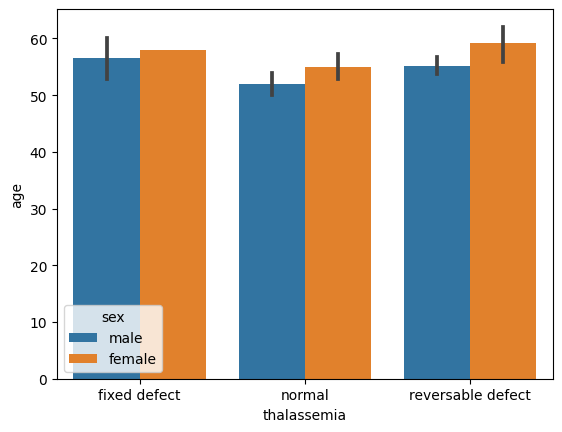

In [17]:
sns.barplot(x='thalassemia', y='age', data=df, hue='sex')

# 3. Distplot (Numerical - Categorical)

<Axes: xlabel='age', ylabel='Density'>

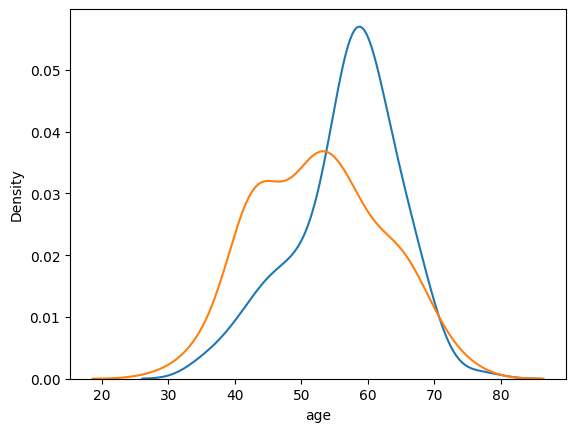

In [18]:
sns.distplot(df[df['target']==0]['age'],hist=False)
sns.distplot(df[df['target']==1]['age'],hist=False)

# 4. HeatMap (Categorical - Categorical)

<Axes: xlabel='fasting_blood_sugar', ylabel='chest_pain_type'>

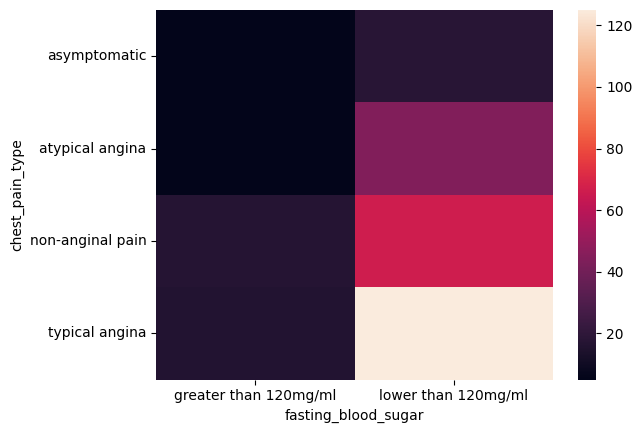

In [19]:
sns.heatmap(pd.crosstab(df['chest_pain_type'], df['fasting_blood_sugar']))

# 5. Lineplot (Numerical - Numerical)

<Axes: xlabel='age', ylabel='resting_blood_pressure'>

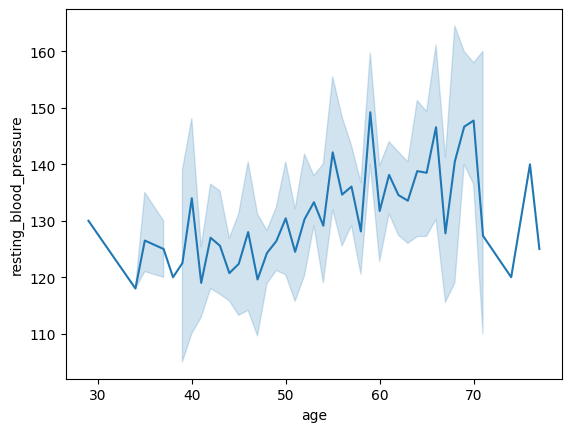

In [20]:
sns.lineplot(x='age', y='resting_blood_pressure', data=df)

# 6. Pairplot

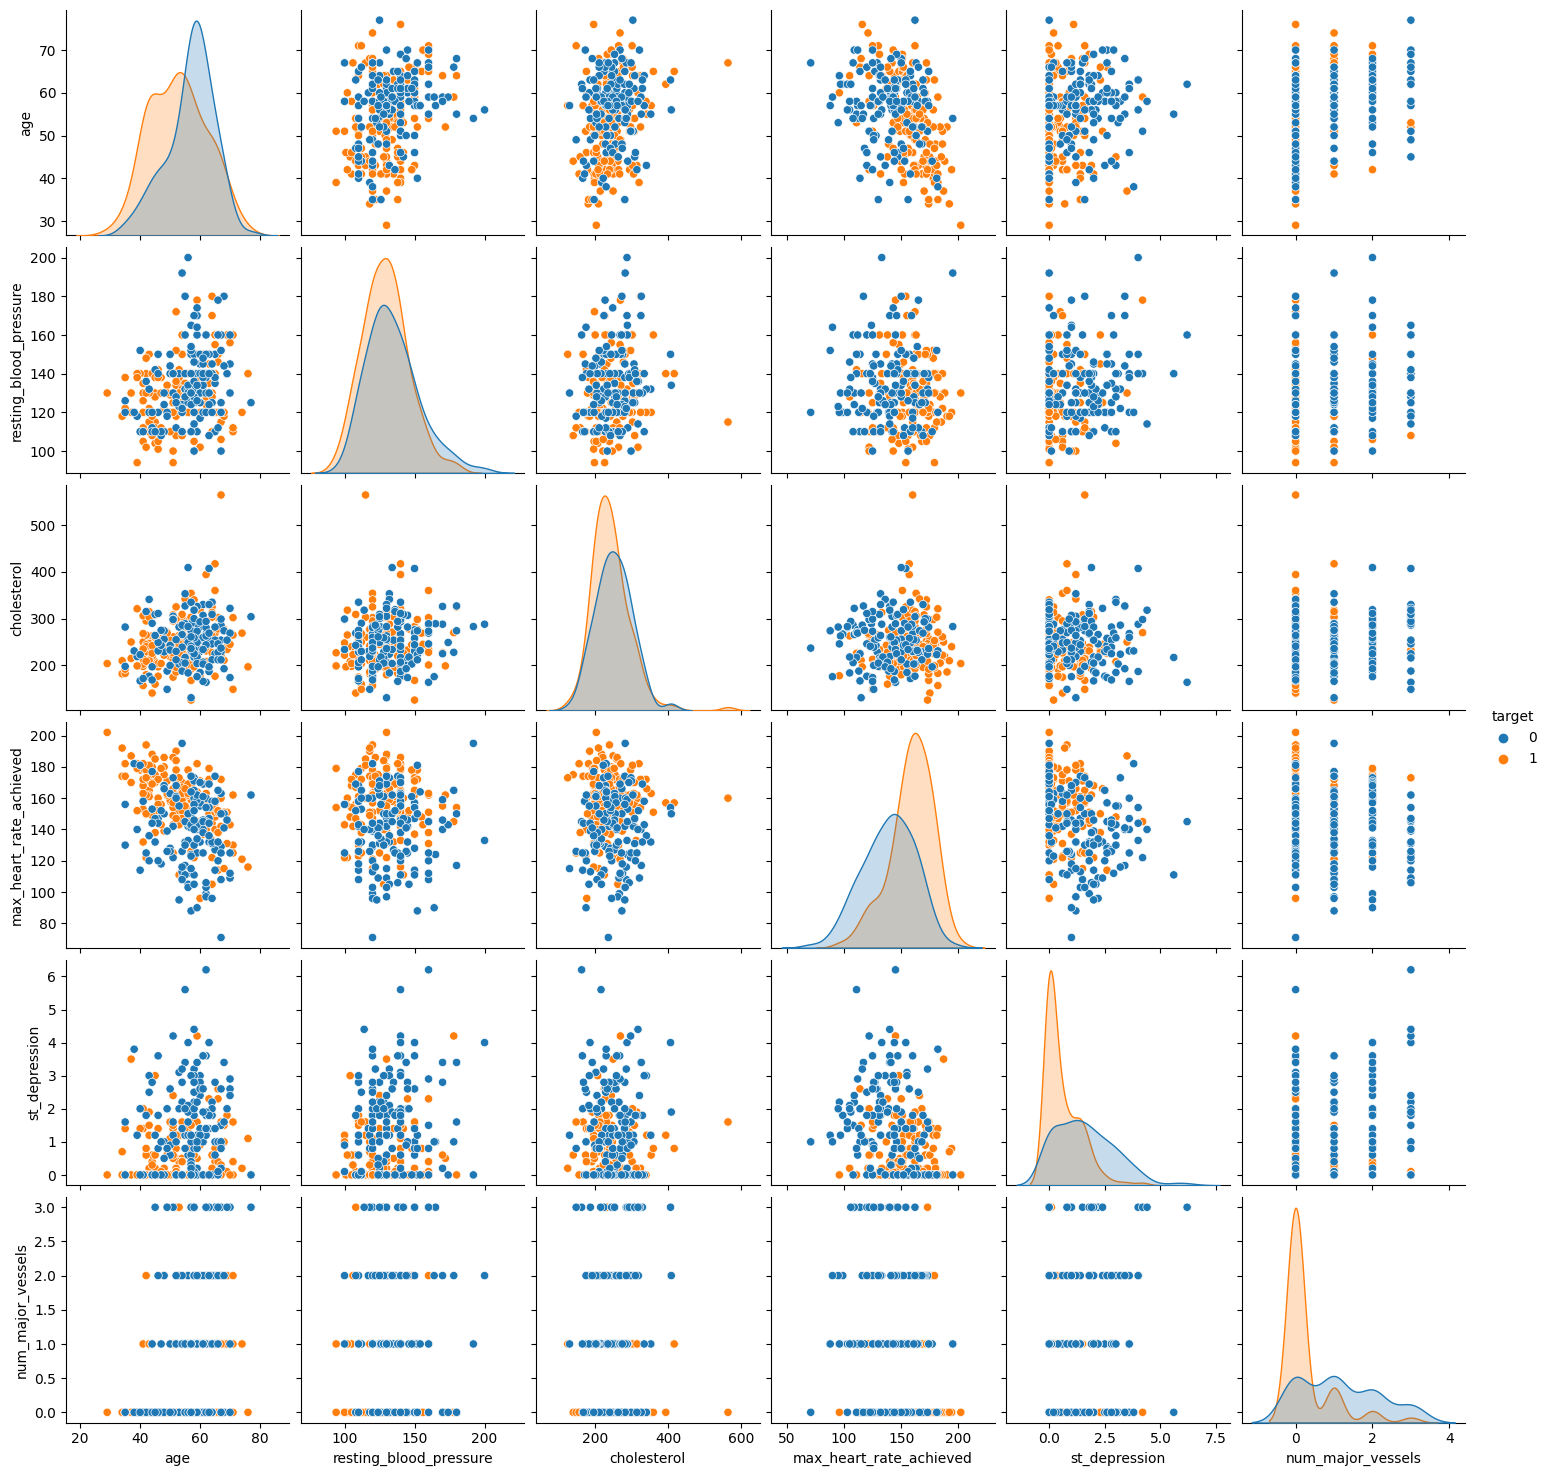

In [21]:
sns.pairplot(df, hue='target')

In [22]:
#copying the dataframe

new_df = df.copy()
new_df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


# Encoding the data

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encoder = LabelEncoder()
new_df['sex'] = label_encoder.fit_transform(new_df['sex'])
new_df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,1,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,0,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,1,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,0,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


In [25]:
#function for encoding data all at once

def encode_data(new_df, cat_feats):
    label_encoder = LabelEncoder()
    for col in cat_feats:
        new_df[col] = label_encoder.fit_transform(new_df[col])
    return new_df

In [26]:
encode_data(new_df, cat_feats)
new_df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,0,145,233,0,2,150,0,2.3,2,0,0,1
1,37,1,2,130,250,1,0,187,0,3.5,2,0,1,1
2,41,0,1,130,204,1,2,172,0,1.4,0,0,1,1
3,56,1,1,120,236,1,0,178,0,0.8,0,0,1,1
4,57,0,3,120,354,1,0,163,1,0.6,0,0,1,1


# Model Training

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = new_df[new_df.columns[:-1]]
y = new_df[new_df.columns[-1]]

In [29]:
X.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,0,145,233,0,2,150,0,2.3,2,0,0
1,37,1,2,130,250,1,0,187,0,3.5,2,0,1
2,41,0,1,130,204,1,2,172,0,1.4,0,0,1
3,56,1,1,120,236,1,0,178,0,0.8,0,0,1
4,57,0,3,120,354,1,0,163,1,0.6,0,0,1


In [30]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [32]:
X_train.shape

(222, 13)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score

In [34]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = clf.predict(X_test)

In [36]:
y_test

230    0
228    0
12     1
215    0
264    0
      ..
27     1
221    0
255    0
37     1
226    0
Name: target, Length: 74, dtype: int64

In [37]:
y_pred

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0])

In [38]:
accuracy_score(y_test, y_pred)

0.8648648648648649

In [39]:
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        39
           1       0.82      0.91      0.86        35

    accuracy                           0.86        74
   macro avg       0.87      0.87      0.86        74
weighted avg       0.87      0.86      0.86        74



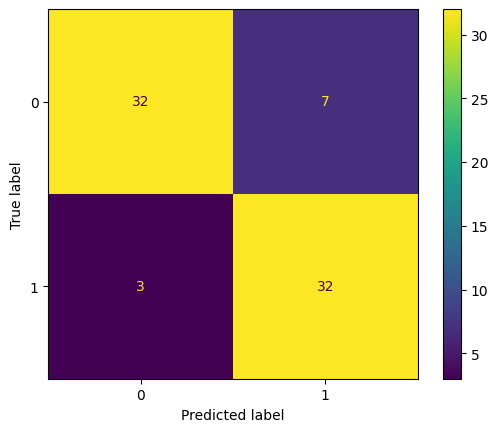

In [40]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [41]:
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Decision Tree',
    'Random Forest',
    'Naive Bayes',
]

classifiers = [
    LogisticRegression(random_state=0),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=0),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    GaussianNB(),
]


In [42]:
def score_summary(names, classifiers):
    cols=["Classifier", "Accuracy", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)
    
    for name, clf in zip(names, classifiers):        
        clf.fit(X_train, y_train)
        
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        
        # confusion matrix, cm
        cm = confusion_matrix(y_test, pred) 
        
        # recall: TP/(TP+FN)
        recall = cm[1,1]/(cm[1,1] +cm[1,0])
        
        # precision: TP/(TP+FP)
        precision = cm[1,1]/(cm[1,1] +cm[0,1])
        
        # F1 score: TP/(TP+FP)
        f1 = 2*recall*precision/(recall + precision)

        df = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)
        data_table = pd.concat([data_table, df], ignore_index=True)     

    return(np.round(data_table.reset_index(drop=True), 2))

In [43]:
score_summary(names, classifiers).sort_values(by='Accuracy' , ascending = False)

,Classifier,Accuracy,Recall,Precision,F1
0,Logistic Regression,86.49,0.91,0.82,0.86
4,Random Forest,83.78,0.83,0.83,0.83
3,Decision Tree,82.43,0.83,0.81,0.82
5,Naive Bayes,82.43,0.86,0.79,0.82
2,Support Vectors,64.86,0.89,0.58,0.70
1,Nearest Neighbors,55.41,0.31,0.55,0.40


In [44]:
def plot_conf_matrix(names, classifiers):
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
        disp.plot()
        plt.title(name)

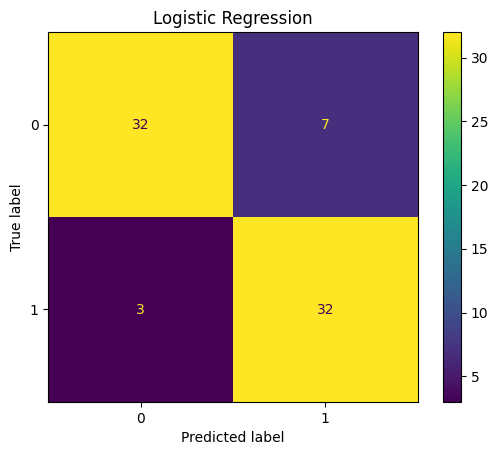

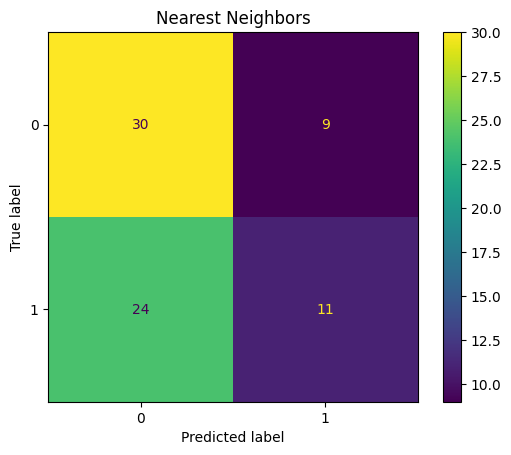

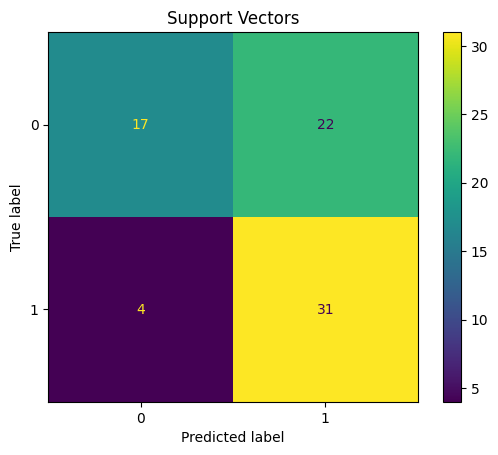

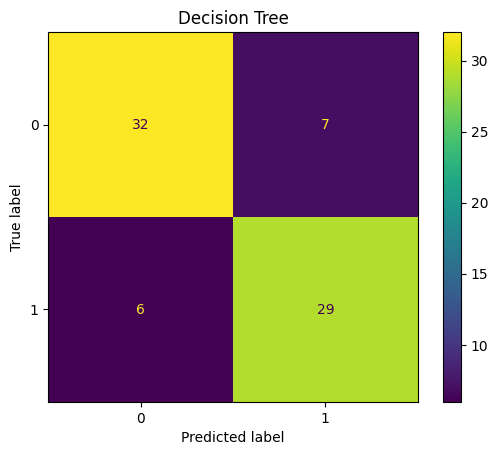

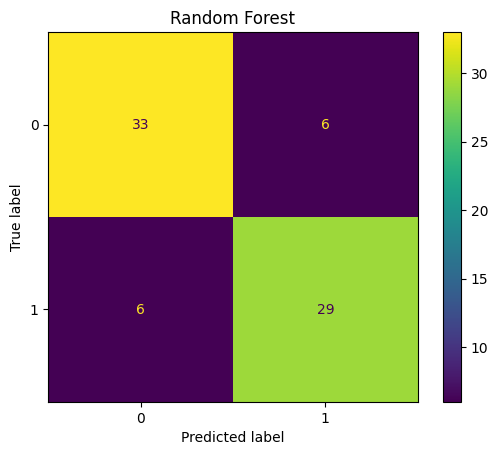

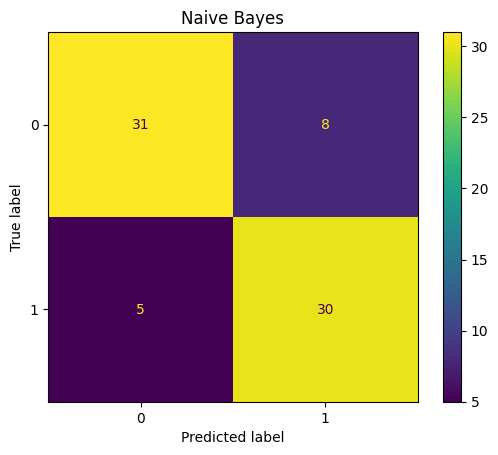

In [45]:
plot_conf_matrix(names, classifiers)

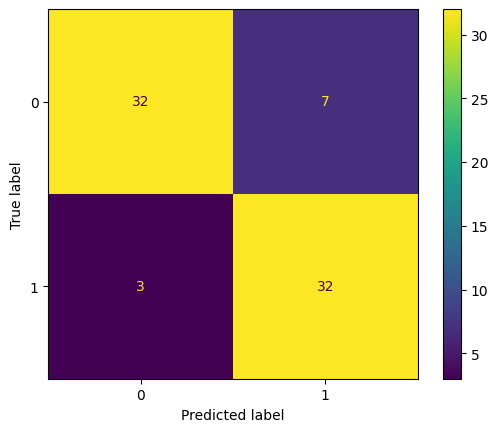

In [46]:
#training Logistic regression once again

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [47]:
clf.predict([[20, 0, 2, 100, 200, 1, 0, 107, 0, 3.5, 2, 0, 1]])

array([0])

# Saving the Model

In [48]:
#save the model

import pickle
pickle.dump(clf, open('model.pkl', 'wb'))
pickle.dump(df, open('df.pkl', 'wb'))